In [382]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [383]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_data = pd.read_csv('sample_submission.csv')

In [384]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [385]:
test_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [386]:
sample_data.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


In [387]:
train_data.shape

(1200000, 21)

In [388]:
test_data.shape

(800000, 20)

In [389]:
sample_data.shape

(800000, 2)

## **CheCK For Datatypes**

In [390]:
train_data.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

## **Null Values**

In [391]:
train_data.isnull().sum().sum()

1203748

In [392]:
(train_data.isnull().sum()/(train_data.shape[0])*100).sort_values(ascending=False)


Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
id                       0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Policy Type              0.000000
Policy Start Date        0.000000
Location                 0.000000
Education Level          0.000000
Gender                   0.000000
Premium Amount           0.000000
dtype: float64

## **Data Cleaning**

In [393]:
# We can get rid of ID Column

train_data.drop(columns='id', inplace = True)

test_data.drop(columns='id', inplace = True)

In [394]:
train_data['Policy_Start_Year'] = pd.to_datetime(train_data['Policy Start Date']).dt.year
train_data['Policy_Start_Month'] = pd.to_datetime(train_data['Policy Start Date']).dt.month


train_data.drop(columns='Policy Start Date', inplace = True)

In [395]:
train_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Start_Year,Policy_Start_Month
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,2023,12
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023,6
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,2023,9
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024,6
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021,12


In [396]:
test_data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [397]:
test_data['Policy Start Year'] = pd.to_datetime(test_data['Policy Start Date']).dt.year
test_data['Policy Start Month'] = pd.to_datetime(test_data['Policy Start Date']).dt.month


test_data.drop(columns='Policy Start Date', inplace = True)

In [398]:
test_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Start Year,Policy Start Month
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,Poor,Yes,Weekly,House,2023,6
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,Good,Yes,Rarely,Apartment,2024,4
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,Average,Yes,Monthly,Condo,2023,4
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Poor,Yes,Daily,House,2023,10
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,Average,No,Weekly,House,2021,11


## **Missing Value Treatment**

In [399]:
from sklearn.impute import SimpleImputer, KNNImputer

In [400]:
si = SimpleImputer(strategy='median')

In [401]:
train_data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Policy_Start_Year', 'Policy_Start_Month'],
      dtype='object')

In [402]:
num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age',
       'Credit Score']

In [403]:
train_data[num_cols] = si.fit_transform(train_data[num_cols])

In [404]:
train_data[num_cols].isnull().sum()

Age              0
Annual Income    0
Health Score     0
Vehicle Age      0
Credit Score     0
dtype: int64

In [405]:
# KNNImputer for Categorical 

ki = KNNImputer(weights='distance', n_neighbors=7)

In [406]:
cat_cols = [ 'Previous Claims',
       'Number of Dependents','Insurance Duration']

In [407]:
train_data['Insurance Duration'] = ki.fit_transform(train_data[['Insurance Duration']])
test_data['Insurance Duration'] = ki.fit_transform(test_data[['Insurance Duration']])

In [408]:
(train_data.isnull().sum()/(train_data.shape[0])*100).sort_values(ascending=False)

Previous Claims         30.335750
Occupation              29.839583
Number of Dependents     9.139333
Customer Feedback        6.485333
Marital Status           1.544083
Credit Score             0.000000
Policy_Start_Year        0.000000
Premium Amount           0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Insurance Duration       0.000000
Age                      0.000000
Vehicle Age              0.000000
Gender                   0.000000
Policy Type              0.000000
Location                 0.000000
Health Score             0.000000
Education Level          0.000000
Annual Income            0.000000
Policy_Start_Month       0.000000
dtype: float64

In [409]:
si_cat = SimpleImputer(strategy='most_frequent')

In [410]:
cat_cols = ['Number of Dependents', 'Marital Status', 'Customer Feedback', 'Previous Claims', 'Occupation']

In [411]:
train_data[cat_cols]=si_cat.fit_transform(train_data[cat_cols])

In [412]:
test_data[cat_cols]=si_cat.fit_transform(test_data[cat_cols])

In [413]:
train_data.isnull().sum().sum()

0

## **Feature Encoding**

In [414]:
for i in train_data.select_dtypes('object').columns:
    print(train_data[i].value_counts(normalize=True)*100, '\n')

Gender
Male      50.21425
Female    49.78575
Name: proportion, dtype: float64 

Marital Status
Single      34.493333
Married     32.859667
Divorced    32.647000
Name: proportion, dtype: float64 

Number of Dependents
3.0    27.595583
4.0    18.361667
0.0    18.177000
2.0    17.942750
1.0    17.923000
Name: proportion, dtype: float64 

Education Level
Master's       25.318167
PhD            25.292250
Bachelor's     25.269500
High School    24.120083
Name: proportion, dtype: float64 

Occupation
Employed         53.402083
Self-Employed    23.553750
Unemployed       23.044167
Name: proportion, dtype: float64 

Location
Suburban    33.461833
Rural       33.412250
Urban       33.125917
Name: proportion, dtype: float64 

Policy Type
Premium          33.487167
Comprehensive    33.300000
Basic            33.212833
Name: proportion, dtype: float64 

Previous Claims
0.0    55.788500
1.0    25.067583
2.0    13.971750
3.0     4.084250
4.0     0.889000
5.0     0.168167
6.0     0.025167
7.0     0.00

In [415]:
train_data['Number of Dependents'] = train_data['Number of Dependents'].astype(int)
test_data['Number of Dependents'] = test_data['Number of Dependents'].astype(int)

In [416]:
train_data['Previous Claims'] = train_data['Previous Claims'].astype(int)
test_data['Previous Claims'] = test_data['Previous Claims'].astype(int)

In [417]:
edu_dict = {'High School' : 0, "Bachelor's" : 1, "Master's" : 2, 'PhD' : 3}
loc_dict = {'Rural' : 0, 'Suburban' : 1, 'Urban' : 2}
policy_dict = {'Basic' : 0, 'Comprehensive' : 1, 'Premium':2}
feed_dict = {'Poor' : 0, 'Average' : 1, 'Good' : 2}
excer_dict = {'Rarely' : 0, 'Monthly' : 1, 'Weekly' : 2, 'Daily' : 3}

In [418]:
train_data['Education Level'] = train_data['Education Level'].map(edu_dict)
test_data['Education Level'] = test_data['Education Level'].map(edu_dict)
train_data['Location'] = train_data['Location'].map(loc_dict)
test_data['Location'] = test_data['Location'].map(loc_dict)
train_data['Policy Type'] = train_data['Policy Type'].map(policy_dict)
test_data['Policy Type'] = test_data['Policy Type'].map(policy_dict)
train_data['Customer Feedback'] = train_data['Customer Feedback'].map(feed_dict)
test_data['Customer Feedback'] = test_data['Customer Feedback'].map(feed_dict)
train_data['Exercise Frequency'] = train_data['Exercise Frequency'].map(excer_dict)
test_data['Exercise Frequency'] = test_data['Exercise Frequency'].map(excer_dict)

In [419]:
lb  = LabelEncoder()

train_data['Occupation'] = lb.fit_transform(train_data['Occupation'])

test_data['Occupation'] = lb.fit_transform(test_data['Occupation'])


In [420]:
# N-1 Dummy Encoding for rest

train_data = pd.get_dummies(train_data, dtype = int, drop_first=True)
test_data = pd.get_dummies(test_data, dtype = int, drop_first=True)

In [421]:
test_data.head()

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Exercise Frequency,Policy Start Year,Policy Start Month,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes,Property Type_Condo,Property Type_House
0,28.0,2310.0,4,1,1,7.657981,0,0,0,19.0,NaN,1.0,0,2,2023,6,0,0,1,1,0,1
1,31.0,126031.0,2,2,1,13.381379,1,2,0,14.0,372.0,8.0,2,0,2024,4,0,1,0,1,0,0
2,47.0,17092.0,0,3,2,24.354527,2,1,0,16.0,819.0,9.0,1,1,2023,4,0,0,0,1,1,0
3,28.0,30424.0,3,3,1,5.136225,1,1,1,3.0,770.0,5.0,0,3,2023,10,0,0,0,1,0,1
4,24.0,10863.0,2,0,2,11.844155,1,2,0,14.0,755.0,7.0,1,2,2021,11,1,0,0,0,0,1


In [422]:
train_data.isnull().sum()

Age                       0
Annual Income             0
Number of Dependents      0
Education Level           0
Occupation                0
Health Score              0
Location                  0
Policy Type               0
Previous Claims           0
Vehicle Age               0
Credit Score              0
Insurance Duration        0
Customer Feedback         0
Exercise Frequency        0
Premium Amount            0
Policy_Start_Year         0
Policy_Start_Month        0
Gender_Male               0
Marital Status_Married    0
Marital Status_Single     0
Smoking Status_Yes        0
Property Type_Condo       0
Property Type_House       0
dtype: int64

## **Feature Transformation**

### Outlier Detection


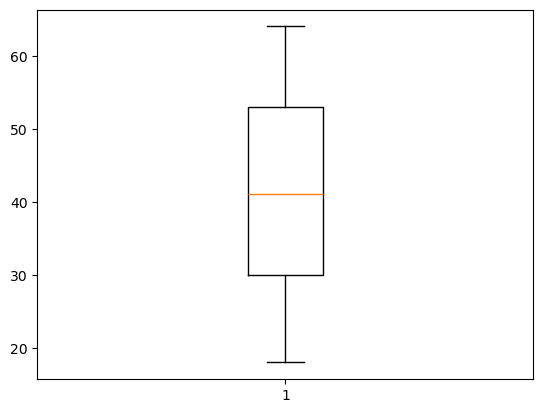

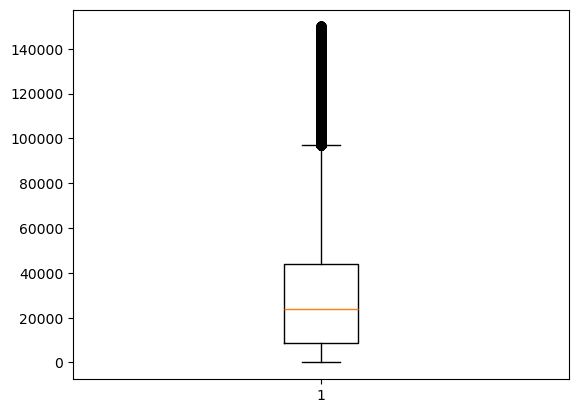

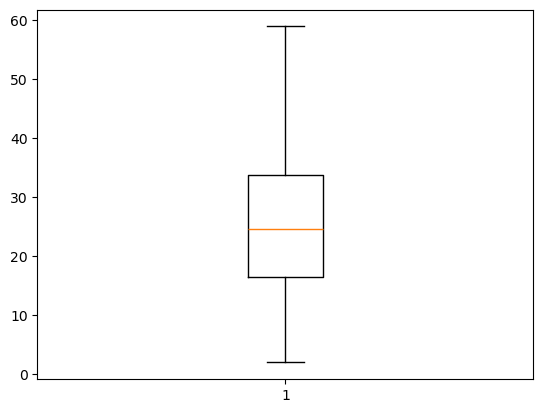

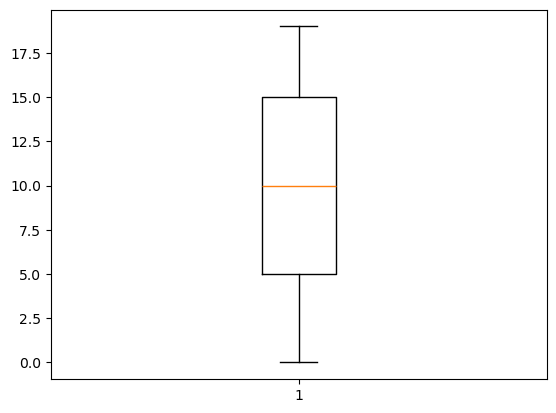

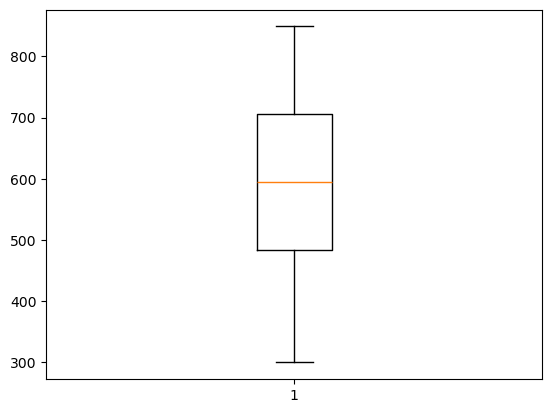

In [423]:
for i in num_cols:
    plt.boxplot(data = train_data[num_cols], x = i)
    plt.show()

## **Modelling**

In [424]:
y = train_data['Premium Amount']
x = train_data.drop(columns = 'Premium Amount')

In [425]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=1100000, random_state=1)

print(f'''X-Train Shape : {x_train.shape}
X-Val Shape : {x_val.shape}
Y-Train Shape : {y_train.shape}
Y-Val Shape : {y_val.shape}''')

X-Train Shape : (1100000, 22)
X-Val Shape : (100000, 22)
Y-Train Shape : (1100000,)
Y-Val Shape : (100000,)


In [426]:
def model_val(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)

    print('R2', r2_score(ytest, pred))
    print('MSE', mean_squared_error(ytest, pred))
    print('RMSE', (mean_squared_error(ytest, pred))**0.5)
    print('MSLE', mean_squared_log_error(ytest, pred))
    print('MAPE', mean_absolute_percentage_error(ytest, pred))
    print('RMSLE', (mean_squared_log_error(ytest, pred))**0.5)

In [427]:
model_val(LinearRegression(), x_train,y_train,x_val, y_val)

R2 0.0030213477070890615
MSE 751901.0715385919
RMSE 867.122293300427
MSLE 1.3630919041438037
MAPE 3.0058726848743222
RMSLE 1.1675152693407498


In [428]:
model_val(DecisionTreeRegressor(max_depth=7),x_train, y_train, x_val, y_val)

R2 0.03964638666174991
MSE 724279.2102561886
RMSE 851.0459507313273
MSLE 1.3143941959443863
MAPE 3.005356641252258
RMSLE 1.146470320568477


In [429]:
!pip install catboost

In [430]:
!pip install lightgbm

In [431]:
model_val(CatBoostRegressor(), x_train, y_train, x_val, y_val)

Learning rate set to 0.1238
0:	learn: 862.2023713	total: 66.9ms	remaining: 1m 6s
1:	learn: 860.2025720	total: 135ms	remaining: 1m 7s
2:	learn: 858.6100011	total: 201ms	remaining: 1m 6s
3:	learn: 857.3408205	total: 262ms	remaining: 1m 5s
4:	learn: 856.4059647	total: 327ms	remaining: 1m 5s
5:	learn: 855.6901927	total: 395ms	remaining: 1m 5s
6:	learn: 855.0720569	total: 477ms	remaining: 1m 7s
7:	learn: 854.5724854	total: 557ms	remaining: 1m 9s
8:	learn: 854.1819212	total: 637ms	remaining: 1m 10s
9:	learn: 853.8559351	total: 705ms	remaining: 1m 9s
10:	learn: 853.6074947	total: 770ms	remaining: 1m 9s
11:	learn: 853.3642668	total: 846ms	remaining: 1m 9s
12:	learn: 852.9873314	total: 920ms	remaining: 1m 9s
13:	learn: 852.8626286	total: 987ms	remaining: 1m 9s
14:	learn: 852.5312357	total: 1.08s	remaining: 1m 10s
15:	learn: 852.3767313	total: 1.14s	remaining: 1m 9s
16:	learn: 852.1686809	total: 1.19s	remaining: 1m 8s
17:	learn: 851.8332093	total: 1.27s	remaining: 1m 9s
18:	learn: 851.6845673	to

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [432]:
model_val(LGBMRegressor(n_estimators = 200, min_child_weight=1,learning_rate= 0.01), x_train, y_train, x_val, y_val)

R2 0.04814213847640336
MSE 717871.8866106196
RMSE 847.2732065931388
MSLE 1.3075572915999776
MAPE 2.980759427964807
RMSLE 1.1434847141960305


## **Submissions**

In [433]:
final_model = LGBMRegressor(n_estimators=250, min_child_weight=0.018, learning_rate=0.01)

In [434]:
final_model.fit(x,y)

LGBMRegressor(learning_rate=0.01, min_child_weight=0.018, n_estimators=250)

In [435]:
final_model.score(x,y)

0.048004839657248666

In [436]:
train_data.head(5)

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Exercise Frequency,Premium Amount,Policy_Start_Year,Policy_Start_Month,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes,Property Type_Condo,Property Type_House
0,19.0,10049.0,1,1,1,22.598761,2,2,2,17.0,372.0,5.0,0,2,2869.0,2023,12,0,1,0,0,0,1
1,39.0,31678.0,3,2,0,15.569731,0,1,1,12.0,694.0,2.0,1,1,1483.0,2023,6,0,0,0,1,0,1
2,23.0,25602.0,3,0,1,47.177549,1,2,1,14.0,595.0,3.0,2,2,567.0,2023,9,1,0,0,1,0,1
3,21.0,141855.0,2,1,0,10.938144,0,0,1,0.0,367.0,1.0,0,3,765.0,2024,6,1,1,0,1,0,0
4,21.0,39651.0,1,1,1,20.376094,0,2,0,8.0,598.0,4.0,0,2,2022.0,2021,12,1,0,1,1,0,1


In [437]:
test_data.head(5)

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Exercise Frequency,Policy Start Year,Policy Start Month,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes,Property Type_Condo,Property Type_House
0,28.0,2310.0,4,1,1,7.657981,0,0,0,19.0,NaN,1.0,0,2,2023,6,0,0,1,1,0,1
1,31.0,126031.0,2,2,1,13.381379,1,2,0,14.0,372.0,8.0,2,0,2024,4,0,1,0,1,0,0
2,47.0,17092.0,0,3,2,24.354527,2,1,0,16.0,819.0,9.0,1,1,2023,4,0,0,0,1,1,0
3,28.0,30424.0,3,3,1,5.136225,1,1,1,3.0,770.0,5.0,0,3,2023,10,0,0,0,1,0,1
4,24.0,10863.0,2,0,2,11.844155,1,2,0,14.0,755.0,7.0,1,2,2021,11,1,0,0,0,0,1


In [438]:
pred = final_model.predict(test_data)